## Decision Trees
### Agenda
1. Introduction to Decision Trees
2. The Decision Tree Algorithms
3. Decision Tree for Classification

### 1. Introduction to Decision Trees
```
* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have less & right questions compared to not-so-good one
* The nodes are questions & leafs are prediction
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### import data

In [2]:
play_data = pd.read_csv('./DSVC/datasets/tennis.csv.txt')

### show data

In [3]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


* A decision tree for above data

<img src="https://raw.githubusercontent.com/awantik/machine-learning-slides/master/dt4.PNG" width="600px">

### 2. Decision Tree Algorithm

* Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continues'.
* scikit-learn decision trees are based on CART

#### Criterion of creating Decision Tree
* Entropy - Objective of CART is to maximize information gain in each split
* Gini Impurity - If classes are mixed, gini impurity is maximul
##### Both the approaches, yields almost same results. We will discuss algorithm using Entropy


### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [4]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

### Calculation Entropy

根据上边公式，你需要完成下面代码块中Entropy_Play计算的代码

In [5]:
Entropy_Play = None

In [6]:
p_yes = len(play_data.play[play_data.play == "yes"]) / play_data.play.size
p_no = len(play_data.play[play_data.play == "no"]) / play_data.play.size
Entropy_Play = - p_yes * np.log2(p_yes) - p_no * np.log2(p_no)
Entropy_Play

0.9402859586706311

你的Entropy_Play正确结果应该为：0.940285

### Information Gain
* The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook
* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ]  – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ] 

In [7]:
play_data[play_data.outlook == 'sunny'] 

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [8]:
play_data[play_data.outlook == 'overcast'] 

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [9]:
play_data[play_data.outlook == 'rainy'] 

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


### Calculation Information Gain

你需要完成下面代码块中Entropy_Play_Outlook_Sunny计算的代码

In [10]:
Entropy_Play_Outlook_Sunny = None

In [11]:
outlook = play_data[play_data.outlook == "sunny"]
p_yes_i = len(outlook.play[outlook.play == "yes"]) / outlook.play.size
p_no_i = len(outlook.play[outlook.play == "no"]) / outlook.play.size

entropy_yes_i = 0.0
entropy_yes_i_no_i = 0.0

if p_yes_i != 0:
    entropy_yes_i = - p_yes_i * np.log2(p_yes_i)

if p_no_i != 0:
    entropy_yes_i_no_i = - p_no_i * np.log2(p_no_i)

Entropy_Play_Outlook_Sunny = entropy_yes_i + entropy_yes_i_no_i
    
Entropy_Play_Outlook_Sunny 

0.9709505944546686

你的Entropy_Play_Outlook_Sunny正确结果应该为：0.970951

In [12]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [13]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0
outlook = play_data[play_data.outlook == "overcast"]
p_yes_i = len(outlook.play[outlook.play == "yes"]) / outlook.play.size
p_no_i = len(outlook.play[outlook.play == "no"]) / outlook.play.size
entropy_yes_i = 0.0
entropy_yes_i_no_i = 0.0
if p_yes_i != 0:
    entropy_yes_i = - p_yes_i * np.log2(p_yes_i)
if p_no_i != 0:
    entropy_yes_i_no_i = - p_no_i * np.log2(p_no_i)
Entropy_Play_Outlook_Overcast = entropy_yes_i + entropy_yes_i_no_i
Entropy_Play_Outlook_Overcast

0.0

In [14]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [15]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = None

In [16]:
outlook = play_data[play_data.outlook == "rainy"]
p_yes_i = len(outlook.play[outlook.play == "yes"]) / outlook.play.size
p_no_i = len(outlook.play[outlook.play == "no"]) / outlook.play.size
entropy_yes_i = 0.0
entropy_yes_i_no_i = 0.0
if p_yes_i != 0:
    entropy_yes_i = - p_yes_i * np.log2(p_yes_i)
if p_no_i != 0:
    entropy_yes_i_no_i = - p_no_i * np.log2(p_no_i)
Entropy_Play_Outlook_Rainy = entropy_yes_i + entropy_yes_i_no_i
Entropy_Play_Outlook_Rainy

0.9709505944546686

你的Entropy_Play_Outlook_Rain正确结果应该为：0.970951

#### Gain on splitting by attribute outlook

根据以下公式计算Gain

In [17]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]
p_sunny = len(play_data[play_data.outlook == "sunny"]) / len(play_data)
p_overcast = len(play_data[play_data.outlook == "overcast"]) / len(play_data)
p_rainy = len(play_data[play_data.outlook == "rainy"]) / len(play_data)
Gain = Entropy_Play - p_sunny * Entropy_Play_Outlook_Sunny - p_overcast * Entropy_Play_Outlook_Overcast - p_rainy * Entropy_Play_Outlook_Rainy
Gain

0.24674981977443933

你的Gain(Play,Outlook)正确结果应该为:0.246750

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria

In [18]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [19]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


你需要在下面计算Entropy_Play_Outlook_Sunny

In [20]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny = None

In [21]:
play_sunny = play_data[play_data.outlook == 'sunny']
p_yes_sunny = len(play_sunny.play[play_sunny.play == "yes"]) / play_sunny.play.size
p_no_sunny = len(play_sunny.play[play_sunny.play == "no"]) / play_sunny.play.size
Entropy_Play_Outlook_Sunny = - p_yes_sunny * np.log2(p_yes_sunny) - p_no_sunny * np.log2(p_no_sunny)
Entropy_Play_Outlook_Sunny 

0.9709505944546686

你的Entropy_Play_Outlook_Sunny正确结果应该为:0.970951

### Information Gain for humidity

计算湿度信息增益

In [22]:
sunny_high = play_sunny[play_sunny.humidity == "high"]
sunny_high

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [23]:
sunny_yes_i = len(sunny_high.play[sunny_high.play == "yes"]) / sunny_high.play.size
sunny_no_i = len(sunny_high.play[sunny_high.play == "no"]) / sunny_high.play.size
sunny_entropy_yes_i = 0.0
sunny_entropy_yes_i_no_i = 0.0
if sunny_yes_i != 0:
    sunny_entropy_yes_i = - sunny_yes_i * np.log2(sunny_yes_i)
if sunny_no_i != 0:
    sunny_entropy_yes_i_no_i = - sunny_no_i * np.log2(sunny_no_i)
Entropy_Sunny_Humidity_High = sunny_entropy_yes_i + sunny_entropy_yes_i_no_i
Entropy_Sunny_Humidity_High

0.0

In [24]:
sunny_normal = play_sunny[play_sunny.humidity == "normal"]
sunny_normal

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [25]:
sunny_yes_i = len(sunny_normal.play[sunny_normal.play == "yes"]) / sunny_normal.play.size
sunny_no_i = len(sunny_normal.play[sunny_normal.play == "no"]) / sunny_normal.play.size
sunny_entropy_yes_i = 0.0
sunny_entropy_yes_i_no_i = 0.0
if sunny_yes_i != 0:
    sunny_entropy_yes_i = - sunny_yes_i * np.log2(sunny_yes_i)
if sunny_no_i != 0:
    sunny_entropy_yes_i_no_i = - sunny_no_i * np.log2(sunny_no_i)
Entropy_Sunny_Humidity_Normal = sunny_entropy_yes_i + sunny_entropy_yes_i_no_i
Entropy_Sunny_Humidity_Normal

0.0

In [26]:
#Entropy for attribute high = 0, also entropy for attribute normal = 0 
Gain = None

In [27]:
sunny_humidity_high = len(play_sunny[play_sunny.humidity == "high"]) / len(play_sunny)
sunny_humidity_normal = len(play_sunny[play_sunny.humidity == "normal"]) / len(play_sunny)
Gain_For_Humidity = Entropy_Play_Outlook_Sunny - sunny_humidity_high * Entropy_Sunny_Humidity_High - sunny_humidity_normal * Entropy_Sunny_Humidity_Normal
Gain_For_Humidity

0.9709505944546686

你的Information Gain for humidity正确结果应该为:0.970951

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]

计算Entropy_Wind_False

In [28]:
windy_true = play_sunny[play_sunny.windy == True]
windy_true

,outlook,temp,humidity,windy,play
1,sunny,hot,high,True,no
10,sunny,mild,normal,True,yes


In [29]:
windy_yes_i = len(windy_true.play[windy_true.play == "yes"]) / windy_true.play.size
windy_no_i = len(windy_true.play[windy_true.play == "no"]) / windy_true.play.size
windy_entropy_yes_i = 0.0
windy_entropy_yes_i_no_i = 0.0
if windy_yes_i != 0:
    windy_entropy_yes_i = - windy_yes_i * np.log2(windy_yes_i)
if windy_no_i != 0:
    windy_entropy_yes_i_no_i = - windy_no_i * np.log2(windy_no_i)
Entropy_Sunny_Windy_True = windy_entropy_yes_i + windy_entropy_yes_i_no_i
Entropy_Sunny_Windy_True

1.0

In [30]:
windy_false = play_sunny[play_sunny.windy == False]
windy_false

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes


In [31]:
Entropy_Wind_False = None

In [32]:
windy_yes_i = len(windy_false.play[windy_false.play == "yes"]) / windy_false.play.size
windy_no_i = len(windy_false.play[windy_false.play == "no"]) / windy_false.play.size
windy_entropy_yes_i = 0.0
windy_entropy_yes_i_no_i = 0.0
if windy_yes_i != 0:
    windy_entropy_yes_i = - windy_yes_i * np.log2(windy_yes_i)
if windy_no_i != 0:
    windy_entropy_yes_i_no_i = - windy_no_i * np.log2(windy_no_i)
Entropy_Sunny_Windy_False = windy_entropy_yes_i + windy_entropy_yes_i_no_i
Entropy_Sunny_Windy_False

0.9182958340544896

你的Entropy_Wind_False正确结果应该为:0.918296

计算风信息增益

In [33]:
sunny_windy_false = len(play_sunny[play_sunny.windy == False]) / len(play_sunny)
sunny_windy_true = len(play_sunny[play_sunny.windy == True]) / len(play_sunny)
Gain_For_Windy = Entropy_Play_Outlook_Sunny - sunny_windy_false * Entropy_Sunny_Windy_False - sunny_windy_true * Entropy_Sunny_Windy_True
Gain_For_Windy

0.01997309402197489

你的Information Gain for windy正确结果应该为:0.019973

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]

计算热度信息增益

In [34]:
temptrue = ['hot','mild','cool']
Gain_For_Temp = Entropy_Play_Outlook_Sunny
for index in temptrue:
    sunny_temp_chance = len(play_sunny[play_sunny.temp == index]) / len(play_sunny)
    sunny_temp = play_sunny[play_sunny.temp == index]
    temp_yes_i = len(sunny_temp.play[sunny_temp.play == "yes"]) / sunny_temp.play.size
    temp_no_i = len(sunny_temp.play[sunny_temp.play == "no"]) / sunny_temp.play.size
    temp_entropy_yes_i = 0.0
    temp_entropy_yes_i_no_i = 0.0
    if temp_yes_i != 0:
        temp_entropy_yes_i = - temp_yes_i * np.log2(temp_yes_i)
    if temp_no_i != 0:
        temp_entropy_yes_i_no_i = - temp_no_i * np.log2(temp_no_i)
    Entropy_Sunny_Temp_i = temp_entropy_yes_i + temp_entropy_yes_i_no_i
    Gain_For_Temp += - sunny_temp_chance *  Entropy_Sunny_Temp_i
Gain_For_Temp

0.5709505944546686

你的Information Gain for windy正确结果应该为:0.570951

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://raw.githubusercontent.com/awantik/machine-learning-slides/master/dt3.PNG" width="600px">

In [35]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [36]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Splitting the rainy branch

In [37]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [38]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy = None

In [39]:
outlook = play_data[play_data.outlook == "rainy"]
p_yes_i = len(outlook.play[outlook.play == "yes"]) / outlook.play.size
p_no_i = len(outlook.play[outlook.play == "no"]) / outlook.play.size
entropy_yes_i = 0.0
entropy_yes_i_no_i = 0.0
if p_yes_i != 0:
    entropy_yes_i = - p_yes_i * np.log2(p_yes_i)
if p_no_i != 0:
    entropy_yes_i_no_i = - p_no_i * np.log2(p_no_i)
Entropy_Play_Outlook_Rainy = entropy_yes_i + entropy_yes_i_no_i 
Entropy_Play_Outlook_Rainy

0.9709505944546686

你的Entropy_Play_Outlook_Rainy正确结果应该为:0.970951

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

计算温度信息增益

In [48]:
play_rainy = play_data[play_data.outlook == 'rainy']

In [49]:
temptrue = ['mild','cool']
Gain_Windy_For_Temp = Entropy_Play_Outlook_Rainy
for index in temptrue:
    windy_temp_chance = len(play_rainy[play_windy.temp == index]) / len(play_rainy)
    windy_temp = play_rainy[play_rainy.temp == index]
    temp_yes_i = len(windy_temp.play[windy_temp.play == "yes"]) / windy_temp.play.size
    temp_no_i = len(windy_temp.play[windy_temp.play == "no"]) / windy_temp.play.size
    temp_entropy_yes_i = 0.0
    temp_entropy_yes_i_no_i = 0.0
    if temp_yes_i != 0:
        temp_entropy_yes_i = - temp_yes_i * np.log2(temp_yes_i)
    if temp_no_i != 0:
        temp_entropy_yes_i_no_i = - temp_no_i * np.log2(temp_no_i)
    Entropy_Sunny_Temp_i = temp_entropy_yes_i + temp_entropy_yes_i_no_i
    Gain_Windy_For_Temp += - (windy_temp_chance *  Entropy_Sunny_Temp_i)
Gain_Windy_For_Temp

0.01997309402197489

正确结果为0.020151

### Information Gain for Windy

计算风信息增益

In [51]:
temptrue = ['mild','cool']
Gain_Windy_For_Temp = Entropy_Play_Outlook_Rainy
for index in temptrue:
    windy_temp_chance = len(play_rainy[play_rainy.temp == index]) / len(play_rainy)
    windy_temp = play_rainy[play_rainy.temp == index]
    temp_yes_i = len(windy_temp.play[windy_temp.play == True]) / windy_temp.play.size
    temp_no_i = len(windy_temp.play[windy_temp.play == False]) / windy_temp.play.size
    temp_entropy_yes_i = 0.0
    temp_entropy_yes_i_no_i = 0.0
    if temp_yes_i != 0:
        temp_entropy_yes_i = - temp_yes_i * np.log2(temp_yes_i)
    if temp_no_i != 0:
        temp_entropy_yes_i_no_i = - temp_no_i * np.log2(temp_no_i)
    Entropy_Sunny_Temp_i = temp_entropy_yes_i + temp_entropy_yes_i_no_i
    Gain_Windy_For_Temp += - (windy_temp_chance *  Entropy_Sunny_Temp_i)
Gain_Windy_For_Temp

0.9709505944546686

正确结果为0.970951

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [43]:
Entropy_Play_Outlook_Rainy_Normal = None
rainy_normal = play_windy[play_windy.humidity == "normal"]
rainy_normal

,outlook,temp,humidity,windy,play
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes


In [57]:
def play_entropy(rainy_normal):
    rainy_yes_i = len(rainy_normal.play[rainy_normal.play == "yes"]) / rainy_normal.play.size
    rainy_no_i = len(rainy_normal.play[rainy_normal.play == "no"]) / rainy_normal.play.size
    rainy_entropy_yes_i = 0.0
    rainy_entropy_yes_i_no_i = 0.0
    if rainy_yes_i != 0:
        rainy_entropy_yes_i = - rainy_yes_i * np.log2(rainy_yes_i)
    if windy_no_i != 0:
        rainy_entropy_yes_i_no_i = - rainy_no_i * np.log2(rainy_no_i)
    Entropy_Play_Outlook_Rainy_Normal = rainy_entropy_yes_i + rainy_entropy_yes_i_no_i
    return Entropy_Play_Outlook_Rainy_Normal

Entropy_Play_Outlook_Rainy_Normal = play_entropy(rainy_normal)
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

Entropy_Play_Outlook_Rainy_Normal的正确结果为0.918296

In [52]:
Entropy_Play_Outlook_Rainy_Normal = None
rainy_high = play_windy[play_rainy.humidity == "high"]
rainy_high

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
13,rainy,mild,high,True,no


In [59]:
Entropy_Play_Outlook_Rainy_Hight = 0.0
Entropy_Play_Outlook_Rainy_Hight = play_entropy(rainy_high)
Entropy_Play_Outlook_Rainy_Hight

1.0

计算湿度信息增益

In [60]:
rainy_humidity_high = len(play_rainy[play_rainy.humidity == "high"]) / len(play_rainy)
rainy_humidity_normal = len(play_rainy[play_rainy.humidity == "normal"]) / len(play_rainy)
Gain_For_Rainy = Entropy_Play_Outlook_Rainy - rainy_humidity_high * Entropy_Play_Outlook_Rainy_Hight - rainy_humidity_normal * Entropy_Play_Outlook_Rainy_Normal
Gain_For_Rainy

0.01997309402197489

正确结果为0.019973

### Final Tree

<img src="https://raw.githubusercontent.com/awantik/machine-learning-slides/master/dt4.PNG" width="600px">

### 3. Decision Tree for Classification
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz

In [62]:
iris = load_iris()

In [63]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [64]:
iris.target[:5]

array([0, 0, 0, 0, 0])

请在下方实现交叉熵DecisionTreeClassifier：

In [65]:
# DecisionTreeClassifier entropy

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
trainX,testX,trainY,testY = train_test_split(iris.data, iris.target)

请利用实现的DecisionTreeClassifier进行训练：

In [ ]:
def fit(trainX,trainY):
    pass

fit(trainX,trainY)

In [ ]:
export_graphviz(dt,'dt.tree')

### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://raw.githubusercontent.com/awantik/machine-learning-slides/master/dt6.PNG">

在下方写代码来对测试集进行预测：

In [ ]:
def predict(testX):
    pass
predict(testX)

#### Feature Importances
* Important features will be higher up the tree
* We can use this techniques to identify important features

#### Visualizing Decision Decision Boundry

In [68]:
from sklearn.datasets import make_blobs

In [69]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

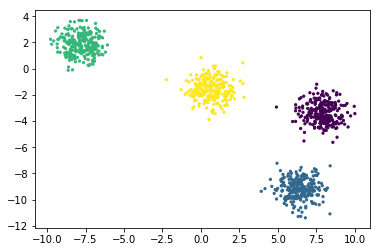

In [70]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

利用基尼系数的决策树实现：

In [ ]:
# DecisionTreeClassifier gini

进行训练

In [ ]:
def fit(trainX,trainY):
    pass

fit(X,Y)

In [ ]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

### Calculation Outcome

你需要完成下面代码块中预测值的计算：

In [ ]:
def predict():
    pass
outcome = None

In [ ]:
xx.shape

NameError: name 'xx' is not defined

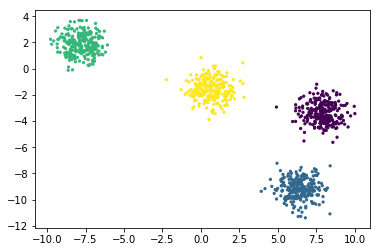

In [71]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

![](img/questions-01.png)